In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
import missingno as msno

# Import Data

In [211]:
# Import Dataset that has processed in phase two 
df = pd.read_csv('Lending Club Updated Version_2.csv')

In [212]:
df.shape 

(107864, 79)

In [173]:
df.describe() 

,loan_amnt,int_rate,annual_inc,dti,delinq_2yrs,fico_range_low,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,...,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,loan_status_1
count,107864.000000,107864.000000,1.078640e+05,107602.000000,107864.000000,107864.000000,107864.000000,47169.000000,15269.000000,107864.000000,...,16331.000000,16331.000000,16331.000000,16021.000000,16331.000000,16331.000000,16331.000000,16331.000000,5427.000000,107864.000000
mean,16147.942780,12.423171,7.854227e+04,19.648209,0.223773,708.248303,0.461266,36.980008,79.156657,11.377151,...,0.647174,1.550915,11.624150,58.675382,3.011573,12.770375,0.057314,0.080583,35.498987,0.145127
std,10184.024938,5.004180,7.687436e+04,21.795902,0.730417,37.205453,0.746153,21.802486,24.817082,5.879388,...,1.021778,1.788622,6.665203,25.927238,3.248730,8.287120,0.455782,0.437520,23.915029,0.352231
min,1000.000000,5.310000,0.000000e+00,0.000000,0.000000,660.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8000.000000,9.430000,4.500000e+04,11.230000,0.000000,680.000000,0.000000,19.000000,64.000000,7.000000,...,0.000000,0.000000,7.000000,39.800000,1.000000,7.000000,0.000000,0.000000,14.000000,0.000000
50%,14000.000000,11.980000,6.500000e+04,17.670000,0.000000,700.000000,0.000000,34.000000,83.000000,10.000000,...,0.000000,1.000000,11.000000,60.700000,2.000000,11.000000,0.000000,0.000000,34.000000,0.000000
75%,22400.000000,15.050000,9.500000e+04,25.020000,0.000000,730.000000,1.000000,53.000000,98.000000,14.000000,...,1.000000,3.000000,15.000000,79.200000,4.000000,17.000000,0.000000,0.000000,55.000000,0.000000
max,40000.000000,30.990000,8.365188e+06,999.000000,20.000000,845.000000,5.000000,226.000000,124.000000,69.000000,...,6.000000,27.000000,66.000000,434.300000,34.000000,85.000000,17.000000,15.000000,131.000000,1.000000


# Deal with Missing Value 

<AxesSubplot:>

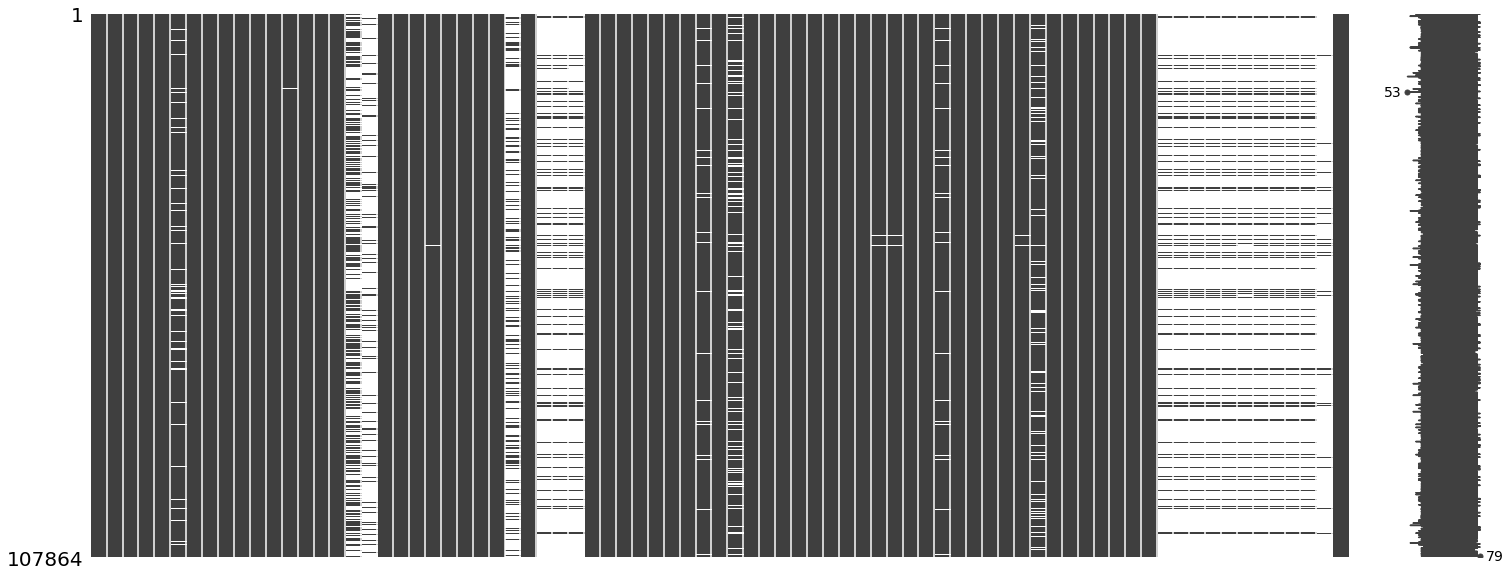

In [174]:
msno.matrix(df) 

In [213]:
def missing_values_table(df):
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
        "There are " + str(mis_val_table_ren_columns.shape[0]) +
        "columns that have missing values.")
        return mis_val_table_ren_columns

missing_table = missing_values_table(df)
missing_table

Your selected dataframe has 79 columns.
There are 29columns that have missing values.


,Missing Values,% of Total Values
sec_app_mths_since_last_major_derog,102437,95.0
mths_since_last_record,92595,85.8
verification_status_joint,91847,85.2
sec_app_revol_util,91843,85.1
sec_app_num_rev_accts,91533,84.9
sec_app_inq_last_6mths,91533,84.9
sec_app_mort_acc,91533,84.9
sec_app_open_acc,91533,84.9
sec_app_open_act_il,91533,84.9
sec_app_chargeoff_within_12_mths,91533,84.9


In [214]:
# from above table, we notice that most of variables required providing second applicant's information 
# filled with lots of the missing value. From industry knowledge judgement, most of these variables 
# did not provide too much information for the model, therefore, all those variables are dropped. 
# After drop, there are totally 70 columns in the dataset. 
sec_cols = [col for col in missing_table.index if 'sec' in col]
df = df.drop(columns= sec_cols)
df.shape

(107864, 69)

In [215]:
missing_table = missing_values_table(df)
missing_table

Your selected dataframe has 69 columns.
There are 19columns that have missing values.


,Missing Values,% of Total Values
mths_since_last_record,92595,85.8
verification_status_joint,91847,85.2
revol_bal_joint,91533,84.9
annual_inc_joint,91533,84.9
dti_joint,91533,84.9
mths_since_last_major_derog,83103,77.0
mths_since_last_delinq,60695,56.3
il_util,17984,16.7
mths_since_recent_inq,13648,12.7
emp_length,9428,8.7


In [216]:
# after dropping the variables concerning second applicant, there are still 20 variables. Top 
# several variables filled with missing variable are about join variable. Generally speaking, 
# those variable also not very important for the model, so all of them are dropped. 
join_cols = [col for col in missing_table.index if 'join' in col]
df = df.drop(columns= join_cols)
df.shape

(107864, 65)

In [217]:
missing_table = missing_values_table(df)
missing_table

Your selected dataframe has 65 columns.
There are 15columns that have missing values.


,Missing Values,% of Total Values
mths_since_last_record,92595,85.8
mths_since_last_major_derog,83103,77.0
mths_since_last_delinq,60695,56.3
il_util,17984,16.7
mths_since_recent_inq,13648,12.7
emp_length,9428,8.7
mths_since_rcnt_il,4288,4.0
mo_sin_old_il_acct,4288,4.0
bc_util,1561,1.4
bc_open_to_buy,1510,1.4


####  mths_since_last_record

In [218]:
df['mths_since_last_record'].value_counts(dropna=False, normalize=True,ascending=False)

NaN      0.858442
94.0     0.002772
82.0     0.002744
92.0     0.002503
84.0     0.002503
           ...   
121.0    0.000037
1.0      0.000028
2.0      0.000019
124.0    0.000019
122.0    0.000009
Name: mths_since_last_record, Length: 125, dtype: float64

In [219]:
# There is loan with 0 and it could be reasonably assunped that all the missing value could be filled as 0
df[df['mths_since_last_record']==0]

,loan_amnt,term,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,purpose,...,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_il_tl,num_tl_90g_dpd_24m,pct_tl_nvr_dlq,pub_rec_bankruptcies,tax_liens,loan_status_1


In [220]:
df['mths_since_last_record'] = df['mths_since_last_record'].fillna(0)

In [221]:
df['mths_since_last_record'].value_counts(dropna=False, normalize=True,ascending=False)

0.0      0.858442
94.0     0.002772
82.0     0.002744
92.0     0.002503
84.0     0.002503
           ...   
121.0    0.000037
1.0      0.000028
2.0      0.000019
124.0    0.000019
122.0    0.000009
Name: mths_since_last_record, Length: 125, dtype: float64

<AxesSubplot:>

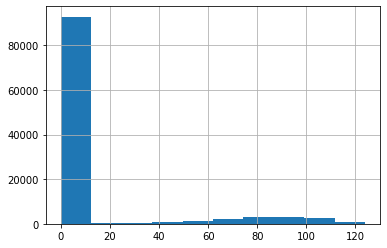

In [222]:
df['mths_since_last_record'].hist()

####  emp_length

In [223]:
df['emp_length'].value_counts(dropna=False)

10+ years    35706
2 years      10191
NaN           9428
3 years       9179
< 1 year      7339
1 year        7169
4 years       6918
5 years       6815
6 years       4716
7 years       4002
8 years       3278
9 years       3123
Name: emp_length, dtype: int64

In [224]:
# Replace missing values with the most common class
df['emp_length'] = df[['emp_length']].apply(lambda x:x.fillna(x.value_counts().index[0]))

In [225]:
df['emp_length'].value_counts(dropna=False)

10+ years    45134
2 years      10191
3 years       9179
< 1 year      7339
1 year        7169
4 years       6918
5 years       6815
6 years       4716
7 years       4002
8 years       3278
9 years       3123
Name: emp_length, dtype: int64

#### revol_util

In [226]:
df['revol_util']

0         24.5%
1         23.7%
2           36%
3         65.3%
4         63.5%
          ...  
107859    90.3%
107860    49.2%
107861    51.9%
107862    43.6%
107863     4.1%
Name: revol_util, Length: 107864, dtype: object

In [227]:
#convert revol_util into float type
df['revol_util'] = df['revol_util'].str.replace('%','')
df['revol_util'] = df['revol_util'].astype('float')
df['revol_util']

0         24.5
1         23.7
2         36.0
3         65.3
4         63.5
          ... 
107859    90.3
107860    49.2
107861    51.9
107862    43.6
107863     4.1
Name: revol_util, Length: 107864, dtype: float64

In [228]:
# All other variables with missing value filled with median 

missing_table = missing_values_table(df)

for col in missing_table.index:
    df[col].fillna(df[col].median(),inplace = True)

Your selected dataframe has 65 columns.
There are 13columns that have missing values.


In [229]:
# Now there is no missing value in the dataset anymore. 
missing_table = missing_values_table(df)
missing_table

Your selected dataframe has 65 columns.
There are 0columns that have missing values.


,Missing Values,% of Total Values


# Numerical variable transformation 
Conduct transformation for some variables with some extreme outliers

## Log Transformation  

According to the analysis result in phase two, we know that the distribution of these two numerical variables, dti and annual_inc,are rather right skew.  

In [230]:
from sklearn.preprocessing import PowerTransformer

In [231]:
pow_trans = PowerTransformer()
pow_trans.fit(df[['dti']])
df['dti_log'] = pow_trans.transform(df[['dti']])

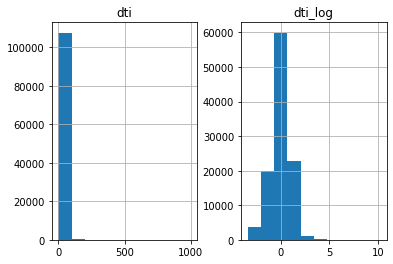

In [232]:
# plot the data before and after the transformation, and we could clearly know that the dti become more normal after log transformation
df[['dti','dti_log']].hist()
plt.show()

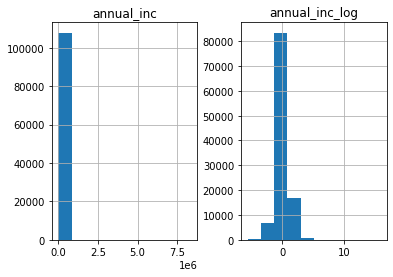

In [233]:
# The below histogram shows that the distrannual_inc 
pow_trans.fit(df[['annual_inc']])
df['annual_inc_log'] = pow_trans.transform(df[['annual_inc']])
df[['annual_inc','annual_inc_log']].hist()
plt.show()

In [234]:
df.drop(columns=['annual_inc','dti'],inplace=True)

## Standardize the continuous variabale 
Rescale the data using scikit-learn using the MinMaxScaler class.

In [197]:
df.dtypes.value_counts()

float64    53
object     11
int64       1
dtype: int64

In [198]:
# 'loan_status_1' is target variable and it would converted into categorical 
df.select_dtypes(include='int64')

,loan_status_1
0,1
1,0
2,0
3,0
4,0
...,...
107859,0
107860,0
107861,0
107862,0


In [235]:
df['loan_status_1'] = df['loan_status_1'].astype('category')

In [236]:
# Standardardize all below variables 
df.select_dtypes(include='float64').columns

Index(['loan_amnt', 'int_rate', 'delinq_2yrs', 'fico_range_low',
       'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'last_fico_range_high', 'collections_12_mths_ex_med',
       'mths_since_last_major_derog', 'acc_now_delinq', 'tot_coll_amt',
       'tot_cur_bal', 'open_acc_6m', 'open_act_il', 'open_il_12m',
       'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util',
       'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util',
       'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m',
       'bc_open_to_buy', 'bc_util', 'chargeoff_within_12_mths', 'delinq_amnt',
       'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op',
       'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc',
       'mths_since_recent_inq', 'num_accts_ever_120_pd', 'num_actv_bc_tl',
       'num_il_tl', 'num_tl_90g_dpd_24m', 'pct_tl_nvr_dlq',
       'pub_rec_bankruptcies', 't

In [237]:
col_continous = [i for i in df.select_dtypes(include='float64').columns]

In [240]:
df[col_continous] = (df[col_continous] - df[col_continous].min())/(df[col_continous].max() - df[col_continous].min())

# Categorical variable transformation 

In [242]:
cat_variables = list(df.select_dtypes(include=['object']).columns)

In [243]:
cat_variables

['term',
 'grade',
 'sub_grade',
 'emp_length',
 'home_ownership',
 'verification_status',
 'purpose',
 'title',
 'addr_state',
 'initial_list_status',
 'application_type']

In [244]:
# Understand the categorical columns and their associated 
vn = pd.DataFrame(df[cat_variables].nunique()).reset_index()
vn.columns = ['VarName', 'LevelsCount']
vn = vn.sort_values(by='LevelsCount',ascending= False)
vn

,VarName,LevelsCount
8,addr_state,50
2,sub_grade,35
6,purpose,13
7,title,12
3,emp_length,11
1,grade,7
4,home_ownership,4
5,verification_status,3
0,term,2
9,initial_list_status,2


In [245]:
# In phase two,conducting bivariate analysis between default_rate and address_state there is no any pattern in these two variables, so 'add_state' could be drop.
df.drop(columns= 'addr_state', inplace=True)

In [246]:
# In phase two, when explore the default_rate Vs grade and default_rate vs sub_grade, they show the similar patter in the plot, 
# so it's reasonble to drop sub_grade 
df['sub_grade'].unique()

array(['C2', 'A1', 'B5', 'B2', 'D4', 'C5', 'D1', 'C4', 'E3', 'D5', 'A3',
       'A4', 'B1', 'B4', 'B3', 'E2', 'C3', 'D2', 'C1', 'G1', 'A5', 'E4',
       'A2', 'D3', 'E5', 'F4', 'F1', 'E1', 'F2', 'F3', 'F5', 'G4', 'G2',
       'G5', 'G3'], dtype=object)

In [247]:
df.drop(columns='sub_grade',inplace=True)

In [248]:
# Understand the categorical columns and their associated again
cat_variables = list(df.select_dtypes(include=['object']).columns)
vn = pd.DataFrame(df[cat_variables].nunique()).reset_index()
vn.columns = ['VarName', 'LevelsCount']
vn = vn.sort_values(by='LevelsCount',ascending= False)
vn

,VarName,LevelsCount
5,purpose,13
6,title,12
2,emp_length,11
1,grade,7
3,home_ownership,4
4,verification_status,3
0,term,2
7,initial_list_status,2
8,application_type,2


#### emp_length	
Among the above categorical variable, only the order in 'emp_length'variale matters, 
so this variable would be encoded specially. 

In [249]:
df['emp_length'].value_counts()

10+ years    45134
2 years      10191
3 years       9179
< 1 year      7339
1 year        7169
4 years       6918
5 years       6815
6 years       4716
7 years       4002
8 years       3278
9 years       3123
Name: emp_length, dtype: int64

In [250]:
df['emp_length'].unique()

array(['7 years', '10+ years', '< 1 year', '4 years', '3 years',
       '5 years', '6 years', '1 year', '9 years', '8 years', '2 years'],
      dtype=object)

In [251]:
df['emp_length'] = df['emp_length'].map({'7 years':7, '10+ years':10, '< 1 year':0, '4 years':4, 
                                   '3 years':3,'5 years':5, '6 years':6, '1 year':1, 
                                   '9 years':9, '8 years':8, '2 years':2})

In [252]:
df['emp_length'] .value_counts()

10    45134
2     10191
3      9179
0      7339
1      7169
4      6918
5      6815
6      4716
7      4002
8      3278
9      3123
Name: emp_length, dtype: int64

In [253]:
df['emp_length'] = df['emp_length'].astype("category")

In [254]:
# get dummy for the categorical variables

In [255]:
df = pd.get_dummies(df, columns=['purpose', 'title', 'grade', 'home_ownership', 'verification_status', 'term','initial_list_status', 'application_type'])

In [256]:
df.shape

(107864, 100)

# Save the processed dataset

In [257]:
df.to_csv(r'D:\Springboard\Github\Lending Club Capstone Project\Lending Club Updated Version_3.csv',index=False)